# Importar librerías

In [122]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import *
import matplotlib.pyplot as plt
import joblib
import seaborn as sns
import numpy as np

# Carga de datos

In [123]:
df = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/k-nearest-neighbors-project-tutorial/refs/heads/main/winequality-red.csv", sep= ';')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


# Preparación de datos

In [124]:
print(df.shape)
df.info()

(1599, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [125]:
n_unicos = df.nunique()
n_unicos

fixed acidity            96
volatile acidity        143
citric acid              80
residual sugar           91
chlorides               153
free sulfur dioxide      60
total sulfur dioxide    144
density                 436
pH                       89
sulphates                96
alcohol                  65
quality                   6
dtype: int64

In [126]:
# Eliminamos duplicados
df = df.drop_duplicates()

In [127]:
# Hacemos la clasificación indicada en las instrucciones
def quality_classification(valor):
    if valor <= 4:
        return 0  # Baja calidad
    elif valor <= 6:
        return 1  # Calidad media
    else:
        return 2  # Alta calidad

df['quality_classification'] = df['quality'].apply(quality_classification)

In [128]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality_classification
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5,1


In [129]:
# Dividir el conjunto de datos en características (X) y etiquetas (y)
X = df[['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol']]
y = df['quality_classification']

# Dividir el conjunto de datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Escalar los datos

In [130]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Entrenar el modelo KNN

In [131]:
# Definir el modelo con k=5
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

# Predecir en el conjunto de prueba
y_pred = knn.predict(X_test_scaled)
y_pred

array([1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 0, 1, 2, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 2, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1,
       1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1,
       2, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 2,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 2, 1, 1, 1, 1])

## Evaluación del rendimiento 

There are many metrics to measure the effectiveness of a model in predicting, including accuracy, which is the fraction of predictions that the model makes correctly

Precisión: 0.82
Matriz de Confusión:


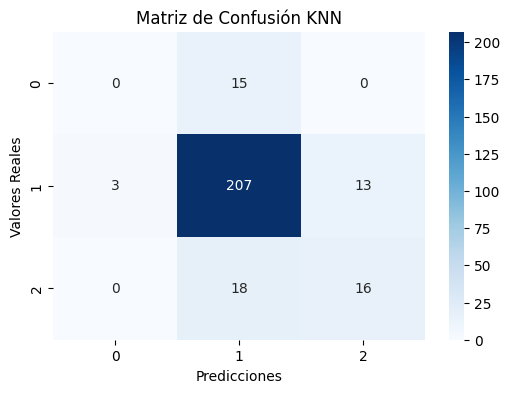

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        15
           1       0.86      0.93      0.89       223
           2       0.55      0.47      0.51        34

    accuracy                           0.82       272
   macro avg       0.47      0.47      0.47       272
weighted avg       0.78      0.82      0.80       272



In [132]:
# Calcular precisión
accuracy = accuracy_score(y_test, y_pred)
print(f"Precisión: {accuracy:.2f}")

# Matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)
print("Matriz de Confusión:")
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicciones")
plt.ylabel("Valores Reales")
plt.title("Matriz de Confusión KNN")
plt.show()

# Reporte de clasificación
class_report = classification_report(y_test, y_pred)
print("Reporte de Clasificación:")
print(class_report)

Fijándonos en la matriz de confusión vemos que el número de aciertos del modelo para el calidad 1 (calidad media) es con diferencia el mejor resultado. Lo que significa que nuestro modelo tiene buen desempeño prediciendo la clase 1 pero tiene dificultades con las clases 0 y 2. Por ejemplo, 0 aciertos para la clase 0. 

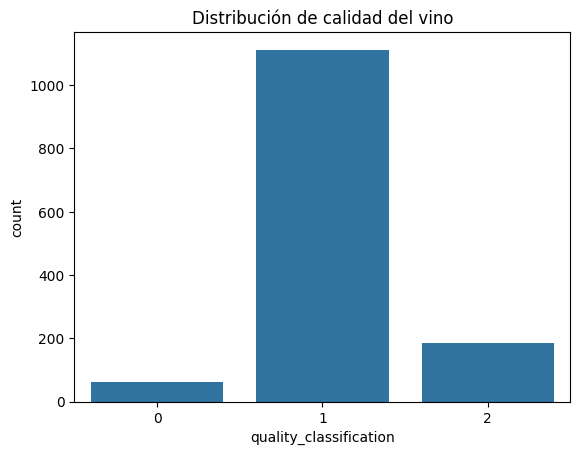

In [133]:
sns.countplot(x=df['quality_classification'])
plt.title("Distribución de calidad del vino")
plt.show()

Buscando alternativas veo que existen estrategias para mejorar la clasificación en las clases menos representadas. Entre ellas, puede usarse la técnica SMOTE (imbalanced-learn) para generar ejemplos sintéticos de las clases menos representadas y equilibrar los datos.
Sin embargo, estoy teniendo problemas para importar la librería correspondiente debido a incompatibilidades entre dentro de scikit-learn y imbalanced-learn.

# Optimización de K

In [134]:
# Lista para almacenar resultados
k_values = range(1, 21) # Permite probar diferentes configuraciones
accuracies = []

In [135]:
# Probar diferentes valores de k
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k, algorithm='brute')
    knn.fit(X_train_scaled, y_train)
    y_pred = knn.predict(X_test_scaled)
    accuracies.append(accuracy_score(y_test, y_pred))

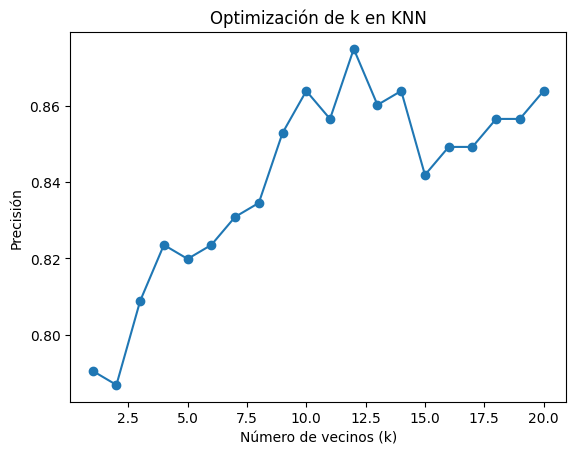

In [136]:
# Graficar accuracy vs k
plt.plot(k_values, accuracies, marker='o')
plt.xlabel("Número de vecinos (k)")
plt.ylabel("Precisión")
plt.title("Optimización de k en KNN")
plt.show()

In [137]:
# Encontrar el índice con la máxima precisión
best_k_index = np.argmax(accuracies)

# Obtener el número de vecinos óptimo
best_k = k_values[best_k_index]
best_accuracy = accuracies[best_k_index]

print(f"El mejor valor de k es {best_k} con una precisión de {best_accuracy:.2f}")

El mejor valor de k es 12 con una precisión de 0.88


In [138]:
# Definir el modelo con k=12
knn = KNeighborsClassifier(n_neighbors=12)
knn.fit(X_train_scaled, y_train)

# Predecir en el conjunto de prueba
y_pred = knn.predict(X_test_scaled)
y_pred

array([1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1,
       2, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 2, 1, 1, 1, 1])

Precisión: 0.88
Matriz de Confusión:


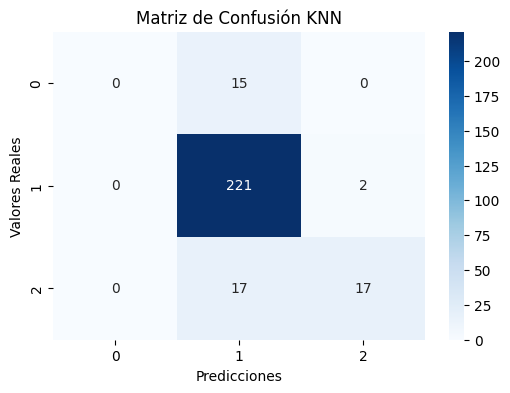

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        15
           1       0.87      0.99      0.93       223
           2       0.89      0.50      0.64        34

    accuracy                           0.88       272
   macro avg       0.59      0.50      0.52       272
weighted avg       0.83      0.88      0.84       272



/home/vscode/.local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  excluded, for example in multiclass classification to exclude a "negative
/home/vscode/.local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  excluded, for example in multiclass classification to exclude a "negative
/home/vscode/.local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  excluded, for example in multiclass classification to exclude a "negative


In [139]:
# Evaluación del rendimiento
# Calcular precisión
accuracy = accuracy_score(y_test, y_pred)
print(f"Precisión: {accuracy:.2f}")

# Matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)
print("Matriz de Confusión:")
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicciones")
plt.ylabel("Valores Reales")
plt.title("Matriz de Confusión KNN")
plt.show()

# Reporte de clasificación
class_report = classification_report(y_test, y_pred)
print("Reporte de Clasificación:")
print(class_report)

# Guardar el modelo entrenado

In [140]:
joblib.dump(knn, "knn_wine_model.pkl")

['knn_wine_model.pkl']